In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./Train.csv")

In [3]:
dataset.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [4]:
from sklearn.linear_model import LinearRegression

In [6]:
dataset = dataset.values

In [117]:
X=dataset[:,0:5]
y=dataset[:,-1]

In [118]:
X.shape,y.shape

((1600, 5), (1600,))

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

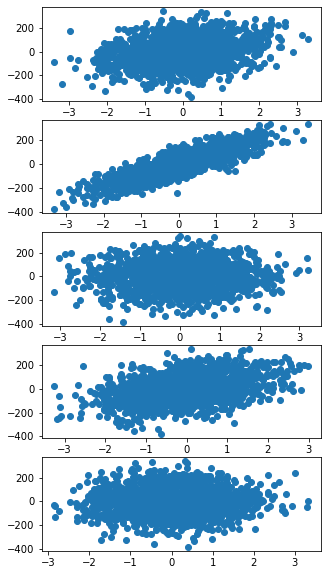

In [120]:
plt.figure(figsize=(5,10))
plt.subplot(5,1,1)
plt.scatter(X[:,0],y)
plt.subplot(5,1,2)
plt.scatter(X[:,1],y)
plt.subplot(5,1,3)
plt.scatter(X[:,2],y)
plt.subplot(5,1,4)
plt.scatter(X[:,3],y)
plt.subplot(5,1,5)
plt.scatter(X[:,4],y)
plt.plot

In [121]:
#normalize data
meu = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-meu)/std

# PREDICTIONS


In [122]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [123]:
coeff=list(model.coef_)
intersept = model.intercept_

In [124]:
theta = []
theta.append(intersept)
for i in range(len(coeff)):
    theta.append(coeff[i])

In [125]:
theta = np.array(theta)

In [126]:
theta

array([ 0.31883538, 29.59359198, 94.65067706,  8.37544469, 45.52303635,
        2.46461552])

In [127]:
test_dataset = pd.read_csv("./Test.csv")

In [128]:
test_dataset.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [129]:
test_dataset = test_dataset.values
test_dataset.shape

(400, 5)

In [130]:
X_test  = test_dataset
X_test.shape

(400, 5)

In [131]:
print(model.predict([X[0],X[1],X[2]]))

[-57.87196311 -89.46019557  53.95305942]


In [132]:
print(X[0],X_test[0])

[ 0.29016495 -0.89871183 -0.37238147  0.44177059  0.52502448] [ 1.01525387  2.07620944 -0.26643482 -2.4180882  -0.98050279]


In [133]:
X.shape

(1600, 5)

In [134]:
X_test.shape

(400, 5)

In [141]:
y_predicted = []
for i in range(X_test.shape[0]):
    pred = list(model.predict([X_test[i]]))
    y_predicted.append(pred)
y_predicted = np.array(y_predicted)

In [144]:
y_predicted = pd.DataFrame(y_predicted)

In [151]:
y_predicted.to_csv("ans",index=False)
